In [1]:
import numpy as np
from PIL import Image, ImageFilter

Padding and find median functions


In [2]:
def padding(maxPad):
  global imag
  counterPadding=np.floor((maxPad-1)/2)
  while(counterPadding):
   imag=np.row_stack((np.array(imag[0,:]),np.array(imag),np.array(imag[-1,:])))
   imag=np.column_stack((np.array(imag[:,0]),np.array(imag),np.array(imag[:,-1])))
   counterPadding=counterPadding-1
  return imag
def find_median(array):
    sorted_array = np.sort(array) #timsort (O(nlogn))
    median = sorted_array[len(array)//2]
    return median

In [3]:
def Compute(filterSize,MaxFilterSize,i,j):
  global imag
  global imageTemp
  global startPoint
  Zxy = 0
  justification = int(np.ceil((filterSize-1)/2))
  AreaNeighberhood=imag[i-justification:i+justification,j-justification:j+justification];
  arr = AreaNeighberhood.reshape(1,-1);
  Zmin=np.min(arr[0,:])
  Zmax=np.max(arr[0,:])
  Zmed=find_median(arr[0,:])
  Zxy=imag[i][j]
  i1 = i-startPoint
  j1 = j - startPoint
  if(Zmed>Zmin and Zmed<Zmax):
    if(Zxy>Zmin and Zxy<Zmax):
        imageTemp[i1,j1]=Zxy
    else:
        imageTemp[i1,j1]=Zmed
  else:
      filterSize = filterSize+2
      if(filterSize<=MaxFilterSize):
        Compute(filterSize,MaxFilterSize,i,j);
      else:
        imageTemp[i1,j1]=imageTemp[i1,j1-1]

In [4]:
def MedianFilter(MaxSizeFilter):
  global imag
  global imageTemp
  global startPoint
  xb,yb = imag.shape
  imageTemp = np.zeros((xb,yb))
  imag = padding(MaxSizeFilter)
  startPoint = int(MaxSizeFilter-MaxSizeFilter//2)
  for i in range(startPoint,startPoint+xb):
    for j in range(startPoint,startPoint+yb):
      Compute(3,MaxSizeFilter,i,j)
  return imageTemp

In [5]:
def AdaptiveFilter(image,MaxSizeFilter):
  global imag
  global imageTemp
  x,y = image.shape
  imag = np.array(image)
  imagTemp = MedianFilter(MaxSizeFilter)
  return imagTemp

In [6]:
def rgb2gray(rgb):
    if(len(rgb.shape) == 3):
        return np.uint8(np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]))
    else:#already a grayscale
        return rgb

In [23]:
image_org = Image.open("/home/harish/Documents/Python Scripts/IVP Lab/Assignment4/lady.png")

In [24]:
image = np.array(image_org)

In [25]:
grayscale_image = rgb2gray(image)

In [26]:
output = AdaptiveFilter(grayscale_image,11)

In [27]:
new_p = Image.fromarray(output)
new_p = new_p.convert("L")

The output obtained by the modified adaptive based median filter 

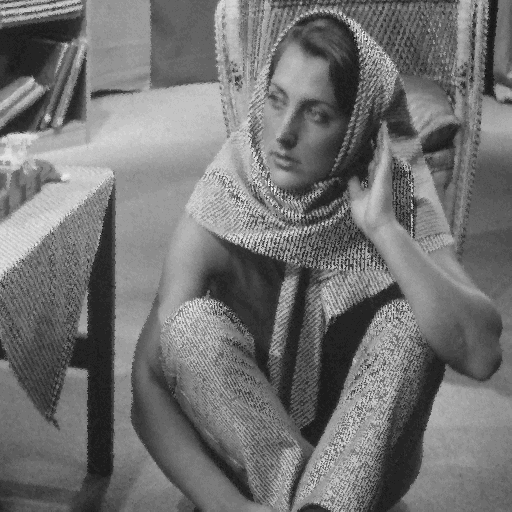

In [28]:
new_p

Original image

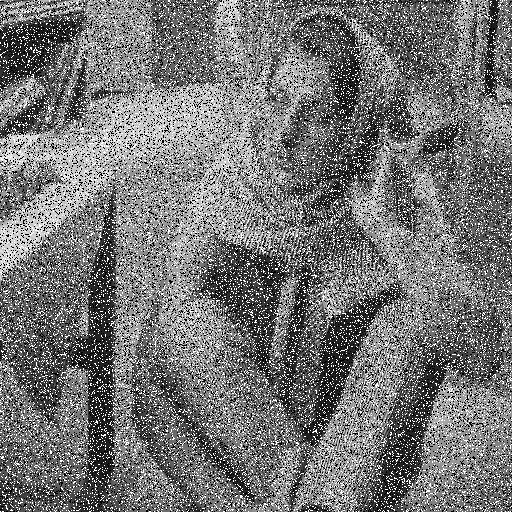

In [29]:
Image.fromarray(grayscale_image)

Output obtained from inbuilt median filter

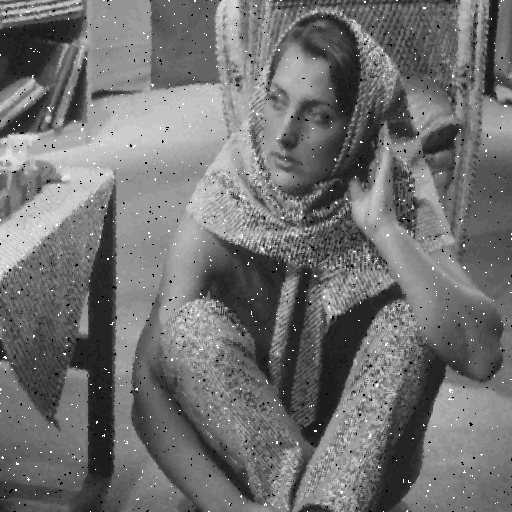

In [30]:
native_output = image_org.filter(ImageFilter.MedianFilter(size = 3))
native_output

In [31]:
deviation_native = np.sqrt(np.sum(np.square(grayscale_image-np.array(rgb2gray(np.array(native_output))))))

In [32]:
deviation_original = np.sum(np.square(grayscale_image-np.array(output)))

In [33]:
print("Deviation from the original salt and pepper images:")
print("Deviation via Median Filter (built-in): ", deviation_native)
print("Deviation via Adaptive Median Filter: ", deviation_original)
print(f"Percent difference b/w deviations: {100*(deviation_original - deviation_native)/deviation_original}%")

Deviation from the original salt and pepper images:
Deviation via Median Filter (built-in):  3473.230628679875
Deviation via Adaptive Median Filter:  1478327229.0
Percent difference b/w deviations: 99.99976505671%
